In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# Explore the database
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [7]:
# reflect an existing database into a new model
# We can view all of the classes that automap found
# Save references to each table
# reflect the tables
Base = automap_base()
Base.prepare(engine,reflect=True)
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

2016-08-23


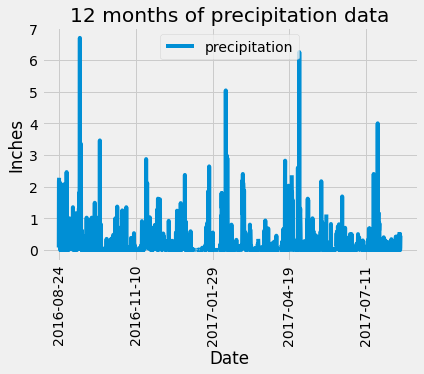

In [9]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
Last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
Last_data_point = dt.date(2017,8,23) - dt.timedelta(days=365)
print(Last_data_point)
# Perform a query to retrieve the data and precipitation scores
# Sort the dataframe by date
pcp_scores = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>Last_data_point).order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
pcp_df = pd.DataFrame(pcp_scores, columns = ["Date", "precipitation"])

# Use Pandas Plotting with Matplotlib to plot the data
pcp_df.plot(x="Date", y="precipitation", rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend(loc="best")
plt.title("12 months of precipitation data")
plt.show()

In [10]:
# Use Pandas to calcualte the summary statistics for the precipitation data 
pcp_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [11]:
# Design a query to show how many stations are available in this dataset?
session.query(Station.station).count()

9

In [12]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 

session.query(Measurement.tobs).filter(Measurement.station=='USC00519281').order_by(Measurement.tobs).first()

(54.0)

In [21]:
# highest temperature recorded, 
session.query(Measurement.tobs).filter(Measurement.station=='USC00519281').order_by(Measurement.tobs.desc()).first()

(85.0)

In [33]:
# and average temperature of the most active station?
session.query(Measurement.tobs, func.mean(Measurement.tobs)).group_by(Measurement.station=='USC00519281').order_by(func.mean(Measurement.tobs))

In [41]:
# Choose the station with the highest number of temperature observations.
session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

2016-08-23


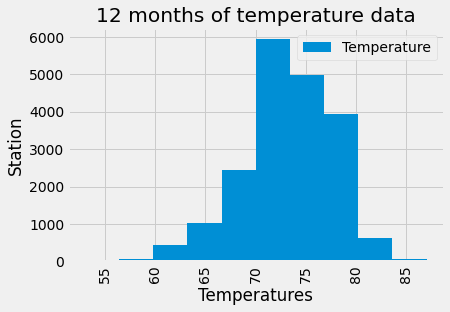

In [46]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
Last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
Last_data_point = dt.date(2017,8,23) - dt.timedelta(days=365)
print(Last_data_point)

pcp_scores = session.query(Measurement.station,Measurement.tobs).filter(Measurement.station>Last_data_point).order_by(Measurement.station).all()


pcp_df = pd.DataFrame(pcp_scores, columns = ["Station", "Temperature"])


pcp_df.plot.hist(x="Station", y="Temperature", rot=90)
plt.xlabel("Temperatures")
plt.ylabel("Station")
plt.legend(loc="best")
plt.title("12 months of temperature data")
plt.show()

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
